## Trabalho T2 sobre Sistemas Lineares

### Métodos Numéricos Computacionais
### UFSM - 2º Semestre de 2023

**Nome dos componentes do grupo:** Murilo Hesse Block e Lucas Both Steinmetz Ribeiro

**Questão 1:**
Resolva o seguinte sistema $Ax=b$ usando decomposição LU mostrando as matrizes triangulares L e U. 

$$ \begin{cases} 
	         6.1x_1 + 0.23x_2 + 1.3x_3 +1.2x_4 + 0.11x_5 = 19.52\\ 
	         0.28x_1  + 8.18x_2  + 1.01x_3 +3x_4 + 3.12x_5= 83.15\\
	         0.5x_1 + 1.78x_2 + 15.2x_3 + 4.2x_4 +8.1x_5= -22.14\\
	         4.2x_1 + 5.3x_2 + 1.8x_3 +29.0x_4 +7.51x_5 = -27.28\\
	         0.2x_1 + 1.9x_2 + 4.86x_3 +4.3x_4 +20.1x_5  = 21.87
	         \end{cases} $$

Então, resolva esse mesmo sistema usando eliminação de Gauss, e compare os coeficientes da matriz do sistema triangular obtido com a matriz U. Comente o que você observou. 

In [1]:
import math
import numpy as np

def LU(A):
    n = len(A)     
    U = np.zeros((n,n))
    L = np.identity(n)
    for m in range(n):
        for j in range(m, n):
            U[m,j] = A[m,j] - np.sum(L[m,0:m] * U[0:m,j])
        for i in range(m+1, n):
            L[i,m] = (A[i,m] - np.sum(L[i,0:m] * U[0:m,m]))/U[m,m]
    return L,U

def solve_L(L,b): 
    x = np.empty(len(b))
    for i in range(len(b)):
        x[i]=(b[i]-np.sum(L[i,:i]*x[:i]))/L[i,i]
    return(x)

def solve_U(U,b):
    x = np.empty(len(b))
    for i in range(len(b)-1,-1,-1):
        x[i]=(b[i]-np.sum(U[i,i+1:]*x[i+1:]))/U[i,i]
    return(x)

def triangulariza(M):
    n = len(M)
    for j in range(n-1):
        for i in range(j,n-1):
            m = M[i+1,j]/M[j,j]
            M[i+1] = M[i+1]-m*M[j]
    return(M)

def solve_trang_sup(M,m):
    M = np.flip(M)
    m = np.flip(m)
    
    for i in range(len(M)):
        m[i] = (m[i]-M[i,:i].dot(m[:i]))/M[i,i]
    return(np.flip(m))

In [2]:
#1
#Decomposição LU

A = np.array([[6.1, 0.23, 1.3, 1.2, 0.11],
            [0.28, 8.18, 1.01, 3, 3.12],
            [0.5, 1.78, 15.2, 4.2, 8.1],
            [4.2, 5.3, 1.8, 29.0, 7.51],
            [0.2, 1.9, 4.86, 4.3, 20.1]])

b = np.array([19.52, 83.15, -22.14, -27.28, 21.87])

L,U = LU(A)

print("Matriz L:")
print(np.array(L))
print("\nMatriz U:")
print(np.array(U))

y = solve_L(L,b)
print("\ny =", y)

x = solve_U(U,y)
print("\nx =", x)

Matriz L:
[[1.         0.         0.         0.         0.        ]
 [0.04590164 1.         0.         0.         0.        ]
 [0.08196721 0.21557744 1.         0.         0.        ]
 [0.68852459 0.62937456 0.0206068  1.         0.        ]
 [0.03278689 0.23165093 0.3087759  0.09554711 1.        ]]

Matriz U:
[[ 6.1         0.23        1.3         1.2         0.11      ]
 [ 0.          8.16944262  0.95032787  2.94491803  3.11495082]
 [ 0.          0.         14.88857337  3.46678145  7.41947048]
 [ 0.          0.          0.         26.24887473  5.32089996]
 [ 0.          0.          0.          0.         16.57546185]]

y = [ 19.52        82.254      -41.47210689 -91.63396754  23.73673223]

x = [ 4.05418375 11.19015762 -2.61867274 -3.78125587  1.43204047]


In [3]:
#Eliminação de Gauss

M = np.hstack((A,b.reshape(5,1)))

T = triangulariza(M)
U = T[:,0:-1]
y = T[:,-1]
x = solve_trang_sup(U, y)

print("Matriz U")
print(np.array(U))
print("\nx =", x)

#Observou-se que os resultados são iguais.


Matriz U
[[ 6.1         0.23        1.3         1.2         0.11      ]
 [ 0.          8.16944262  0.95032787  2.94491803  3.11495082]
 [ 0.          0.         14.88857337  3.46678145  7.41947048]
 [ 0.          0.          0.         26.24887473  5.32089996]
 [ 0.          0.          0.          0.         16.57546185]]

x = [ 4.05418375 11.19015762 -2.61867274 -3.78125587  1.43204047]


**Questão 2:**
Utilize o processo de eliminação para obter a inversa da matriz dos coeficientes do sistema linear dado. Então, use a matriz inversa para obter a solução do sistema.

$$ \begin{cases} 
    12.1756 x_1 + 4.0231 x_2 - 2.1732 x_3 + 5.1967 x_4 = 17.1020\\ 
   -4.0231 x_1 + 6.0030 x_2              + 1.1973 x_4 = -6.1593\\
   -1.0000 x_1 - 5.2107 x_2 + 11.1111 x_3              =  3.0004\\
	6.0235 x_1 + 7.0000 x_2 +            - 14.1561 x_4 =  0.0000
\end{cases} $$

Agora, se possível, utilize algum método iterativo para resolver esse sistema, teste a convergência e mostre o erro para as dez primeiras iterações. Comente o que você observou.

In [4]:
import numpy as np
from numpy.linalg import inv

#2
#Matriz inversa
A = np.array([[12.1756,4.0231,-2.1732,5.1967],
              [-4.0231,6.0030,0.0000,1.1973],
              [-1.0000,-5.2107,11.1111,0.0000],
              [6.0235,7.0000,0.0000,14.1561]])

b = np.array([17.1020,-6.1593,3.0004,0.0000])
x = np.dot(inv(A),b)
print("x =", x)


x = [ 1.79452994  0.3649101   0.60267363 -0.94402567]


In [5]:
#Metodo Jacobi-Richardson
import numpy as np

def itera(x):
    x_new = np.zeros_like(x)
    for i in range(len(A)):
        somatorio = 0
        for j in range(len(A[i])):
            if j != i:
                somatorio += A[i,j] * x[j]
            x_new[i] = (b[i] - somatorio)/A[i,i]
    return x_new

x = np.array([0.,0.,0.,0.])
x_ant = x.copy()

for i in range (10):
    x = itera(x)
    err = np.max(abs(x-x_ant))/np.max(abs(x))
    x_ant = x.copy()
    print("Erro:", err)

print("x =", x)

#Observou-se que os resultados são iguais.



Erro: 1.0
Erro: 0.5253521113270332
Erro: 0.43285735707718026
Erro: 0.15265567145022652
Erro: 0.09887370901682684
Erro: 0.06174143054404956
Erro: 0.026000582393938005
Erro: 0.01816110090469136
Erro: 0.010661501747872061
Erro: 0.004559339502121868
x = [ 1.79058159  0.3538051   0.59529948 -0.9322458 ]


**Questão 3.** 
Sistemas lineares podem ser usados para obter o polinômo de grau $n$ que passa pelos $n+1$ pontos distintos $(x_i, y_i)$, $i=0,1,...,n$. Para isso, basta escrever as equações  

$$ a_nx_i^n + a_{n-1}x_i^{n-1}+...+a_1x_i+a_0 = y_i$$

para cada ponto dado e resolver o sistema encontrando os coeficientes $\{a_0,...,a_n\}$ do polinômio. 

Encontre o polinômio de grau 3 que passa pelos pontos $(1,3)$, $(2,-2)$, $(3,-5)$ e $(4,0)$. Plote o gráfico mostrando o polinômio obtido e os pontos dados.

Polinômio de grau 3: 1x^3 + -5x^2 + 3x + 4


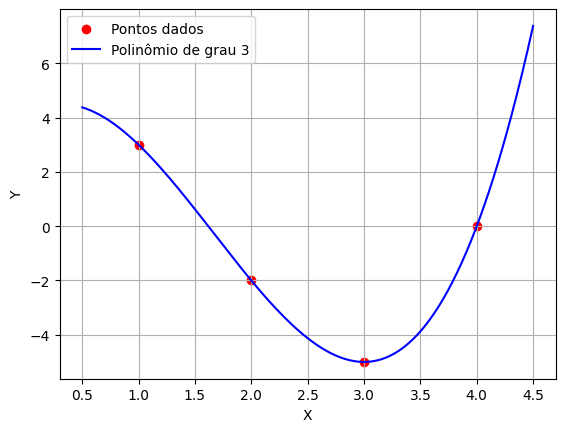

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#3

def LU(A):
    n = len(A)     
    U = np.zeros((n, n))
    L = np.identity(n)
    for m in range(n):
        for j in range(m, n):
            U[m, j] = A[m, j] - np.sum(L[m, :m] * U[:m, j])
        for i in range(m + 1, n):
            L[i, m] = (A[i, m] - np.sum(L[i, :m] * U[:m, m])) / U[m, m]
    return L, U

def solve_L(L, b): 
    x = np.empty(len(b))
    for i in range(len(b)):
        x[i] = (b[i] - np.sum(L[i, :i] * x[:i])) / L[i, i]
    return x

def solve_U(U, b):
    x = np.empty(len(b))
    for i in range(len(b) - 1, -1, -1):
        x[i] = (b[i] - np.sum(U[i, i + 1:] * x[i + 1:])) / U[i, i]
    return x

x_og = np.array([1, 2, 3, 4])
y_og = np.array([3, -2, -5, 0])

A = np.column_stack([x_og**3, x_og**2, x_og, np.ones_like(x_og)])
b = y_og

L, U = LU(A)
y = solve_L(L, b)
x = solve_U(U, y)

a3, a2, a1, a0 = x

def polinomio(x):
    return a3 * x**3 + a2 * x**2 + a1 * x + a0

a3, a2, a1, a0 = x

a3, a2, a1, a0 = map(int, x) 

equacao = f"Polinômio de grau 3: {a3}x^3 + {a2}x^2 + {a1}x + {a0}"
print(equacao)

x_grafico = np.linspace(0.5, 4.5, 400)
y_grafico = polinomio(x_grafico)

plt.scatter(x_og, y_og, color='red', label='Pontos dados')
plt.plot(x_grafico, y_grafico, label='Polinômio de grau 3', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

**Questão 4:**

Em muitas aplicações é necessário encontrar uma função que representa um conjunto de dados obtidos experimentalmente. Podemos encontrar o polinômio de grau 3 que melhor representa um conjunto de 10 pontos $(x_i, y_i)$, $i=1,2,...,10$ resolvendo o sistema linear 

$$(Z^TZ)a = Z^Ty$$

onde $Z$ é a matriz $10\times4$ obtida a partir dos valores de $x_i$, $i=1,2,...,10$ fazendo

$$Z = \left[\begin{matrix}
1 & x_1 & x_1^2 & x_1^3\\
1 & x_2 & x_2^2 & x_2^3\\
1 & x_3 & x_3^2 & x_3^3\\
\vdots & \vdots & \vdots & \vdots\\
1 & x_{10} & x_{10}^2 & x_{10}^3\\
\end{matrix}\right]$$

$a$ é a matriz dos coeficientes do polinômio $a=[a_0, a_1, a_2,a_3]^T$ e $y$ é dado por $y=[y_1,y_2,...,y_{10}]^T$. 

Monte e resolva o sistema para encontrar o polinômio, então, plote o gráfico desse polinômio juntamente com os pontos: $(1.3,1.9)$, $(0.9,3.01)$, $(2.2,-2.1)$, $(1.95,-1.98)$, $(1.78,-1.53)$, $(3.1,-5.01)$, $(2.48,-4.91)$, $(2.74,-5.01)$, $(3.35,-4.02)$ e $(3.99,0.15)$

Polinômio de grau 3: 1.04x^3 + -5.22x^2 + 3.41x + 3.58


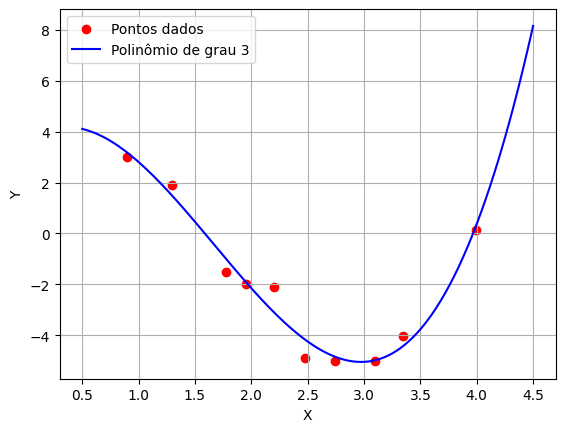

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#4

x = np.array([1.3, 0.9, 2.2, 1.95, 1.78, 3.1, 2.48, 2.74, 3.35, 3.99])
y = np.array([1.9, 3.01, -2.1, -1.98, -1.53, -5.01, -4.91, -5.01, -4.02, 0.15])

n = len(x)
A = np.column_stack([x**i for i in range(4)])  

coefficients = np.linalg.solve(A.T @ A, A.T @ y)
a0, a1, a2, a3 = coefficients

def polinomio(x):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3

equacao = f"Polinômio de grau 3: {a3:.2f}x^3 + {a2:.2f}x^2 + {a1:.2f}x + {a0:.2f}"
print(equacao)

x_grafico = np.linspace(0.5, 4.5, 400)
y_grafico = polinomio(x_grafico)

plt.scatter(x, y, color='red', label='Pontos dados')
plt.plot(x_grafico, y_grafico, label='Polinômio de grau 3', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


**Questão 5:** 

A figura abaixo mostra o corte de uma aleta retangular (seção transversal constante) de comprimento $L = 0,3$ m e espessura $t = 0,01$ m, que está discretizada com $n + 1$ nós equidistantes ($\Delta x=L/n$). O coeficiente de transferência de calor por convecção $h$ é constante. A temperatura de um nó interno, $T_i$, está relacionada com as temperaturas dos nós adjacentes da seguinte maneira:

$$
T_{i-1}-\left\{2+(m \Delta x)^2\right\} T_i+T_{i+1}+(m \Delta x)^2 T_{\infty}=0
$$

em que $ m^2=\frac{h p}{k A_c}$ e $p$ é o perímetro da seção transversal $A_c$. A equação adequada para o nó $n+1$ é dada por:

$$
T_n-\left\{\frac{h \Delta x}{k}+1+\frac{1}{2}(m \Delta x)^2\right\} T_{n+1}+\left\{\frac{h \Delta x}{k}+\frac{1}{2}(m \Delta x)^2\right\} T_{\infty}=0
$$

Para uma situação de convecção natural circundando a aleta, use $h=5 \mathrm{~W} \mathrm{~m}^{-2} \mathrm{~K}^{-1}$. O material da aleta é o alumínio, portanto, apresentando	$k=100 \mathrm{~W} \mathrm{~m}^{-1} \mathrm{~K}^{-1}$. A temperatura da base é $T_b=373,15 \mathrm{~K}$ e a temperatura do ambiente circundante é	$T_{\infty}=298,15 \mathrm{~K}$. Utilizando $n = 10$, monte o sistema de equações lineares para as temperaturas ao longo da aleta e obtenha a solução usando um dos métodos estudados.
Apresente a resposta na forma de uma tabela e de um gráfico. 

<img src="aleta.png" width="500">



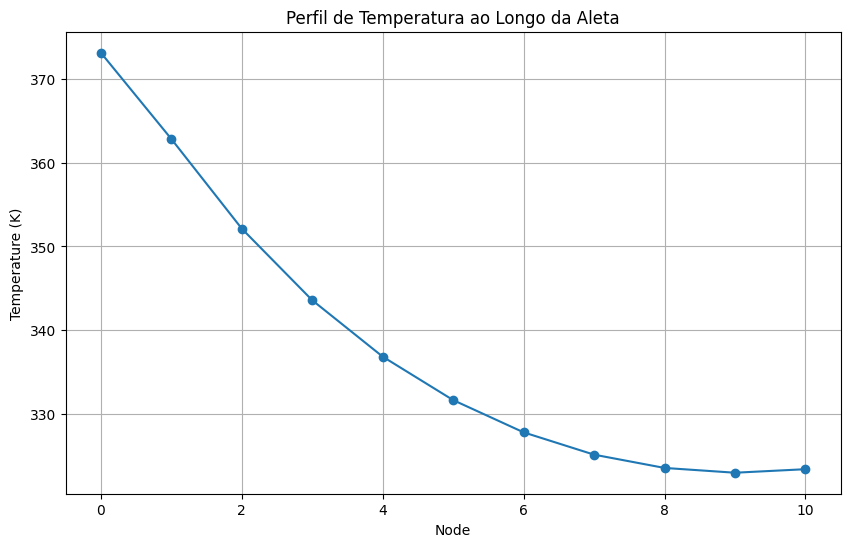

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def LU(A):
    n = len(A)     
    U = np.zeros((n,n))
    L = np.identity(n)
    for m in range(n):
        for j in range(m, n):
            U[m,j] = A[m,j] - np.sum(L[m,0:m] * U[0:m,j])
        for i in range(m+1, n):
            L[i,m] = (A[i,m] - np.sum(L[i,0:m] * U[0:m,m]))/U[m,m]
    return L,U

def solve_L(L,b): 
    x = np.empty(len(b))
    for i in range(len(b)):
        x[i]=(b[i]-np.sum(L[i,:i]*x[:i]))/L[i,i]
    return (x)

def solve_U(U,b):
    x = np.empty(len(b))
    for i in range(len(b)-1,-1,-1):
        x[i]=(b[i]-np.sum(U[i,i+1:]*x[i+1:]))/U[i,i]
    return (x)

L = 0.3  
t = 0.01  
n = 10 
dx = L / n  
h = 5.0  
k = 100.0 
Tb = 373.15 
T_infinity = 298.15  

Ac = t * dx 
p = (t + dx)  
m_square = h * p / (k * Ac)

A = np.zeros((n + 1, n + 1))
b = np.zeros(n + 1)

for i in range(1, n):
    A[i, i - 1] = 1.0
    A[i, i] = -2 - (m_square * dx) ** 2
    A[i, i + 1] = 1.0
    b[i] = -(m_square * dx) ** 2 * T_infinity

A[1, 1] = -2 - (m_square * dx) ** 2
A[1, 2] = 1.0
b[1] = -(m_square * dx) ** 2 * Tb

A[0, 0] = 1.0
A[0, 1] = 0.0
b[0] = Tb

A[n, n] = 1.0
A[n, n - 1] = -(h * dx / k) - 1 - 0.5 * (m_square * dx) ** 2
b[n] = -(h * dx / k) * Tb - 0.5 * (m_square * dx) ** 2 * T_infinity

L, U = LU(A)
y = solve_L(L, b)
T = solve_U(U, y)

nodes = np.arange(n + 1)

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(nodes, T, marker='o')
plt.xlabel('No')
plt.ylabel('Temperature (K)')
plt.title('Perfil de Temperatura ao Longo da Aleta')
plt.grid(True)
plt.show()
